In this file we will try to model starss resolft modality 2.
We will use only the off-switching branch.

In [1]:
# Import the modules
import rotational_diffusion_photophysics as kd
import numpy as np
import matplotlib.pyplot as plt
from codetiming import Timer

# Parameters
tau = 600e-6 # us anisotropy decay
D = 1/(tau*6) # Hz
yield_off = 0.001 
tau_off = 300e-6 # time constant off switching
tau_on_exc = 3.6e-9 # lifetime of excited state
k21 = 1 / tau_off / yield_off
k12 = 1 / tau_on_exc
k32 = 1 /tau_off / yield_off


<Figure size 432x288 with 0 Axes>

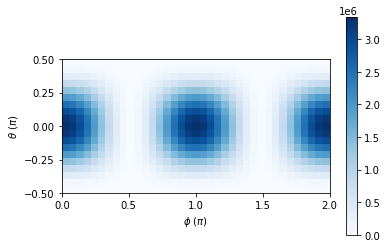

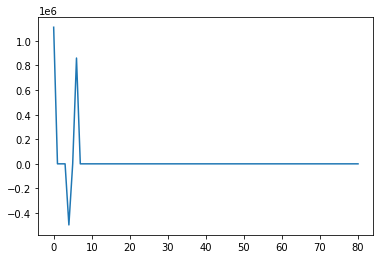

In [2]:
# Angular dependence of k21 in Hz
lmax = 8
omega = kd.make_angles(lmax)
k21a = np.cos(omega[0])**2 * np.cos(omega[1])**2 * k21  # Along x
# k21a = np.cos(omega[0])**2 * np.sin(omega[1])**2 * k21  # Along y
# k21a = np.sin(omega[0])**2 * k21  # Along z
# k21a = k21- + 0*omega[0]
k21grid, k21c, k21cilm = kd.make_grid(k21a, lmax)

plt.figure()
kd.plot_proj(k21grid, clims=[])

plt.figure()
plt.plot(k21c)


In [3]:
# Array with all the diffusion tensors/scalar for every specie.
# In this case every specie diffuse with the same rate.
Dvec = [D, D, D]

# Array with kinetic constants connecting the states.
Kmatrix = [[   0, k12, 0],
            [k21a,   0, 0],
            [   0, k32, 0]]

t = Timer()
t.start()
M = kd.kinetics_diffusion_matrix(Dvec, Kmatrix, lmax)
t.stop()

# Prepare initial conditions, all population in state 1
c0a = omega[0]*0 + 1
c0grid, c0vec, c0cilm = kd.make_grid(c0a, lmax)
c0 = np.zeros((3, (lmax+1)**2))
c0[0,:] = c0vec

Elapsed time: 0.0922 seconds


In [4]:
# # Array with all the diffusion tensors/scalar for every specie.
# # In this case every specie diffuse with the same rate.
# Dvec = [D, D]

# # Array with kinetic constants connecting the states.
# Kmatrix = [[  0,   0 ],
#             [ k21a, 0 ]]

# t = Timer()
# t.start()
# M = kd.kinetics_diffusion_matrix(Dvec, Kmatrix, lmax)
# t.stop()

# # Prepare initial conditions, all population in state 1
# c0a = omega[0]*0 + 1
# c0grid, c0vec, c0cilm = kd.make_grid(c0a, lmax)
# c0 = np.zeros(((lmax+1)**2, 2))
# c0[:,0] = c0vec

In [5]:
# Do the time evolution
time = np.logspace(-7,-2,32)
# time = np.linspace(0,1e-3,1000)
t.start()
c, L, U = kd.solve_evolution(M, c0, time)
t.stop()


Elapsed time: 0.2031 seconds
c:\Users\andre\Documents\GitHub\rotational_diffusion_photophysics\rotational_diffusion_photophysics.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  c[:,i] = ci


0.2030782999999996

(3, 81, 32)


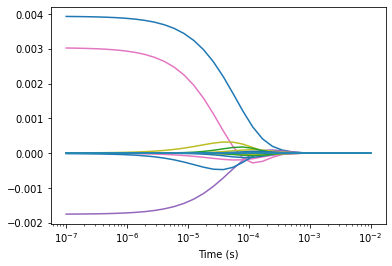

<Figure size 432x288 with 0 Axes>

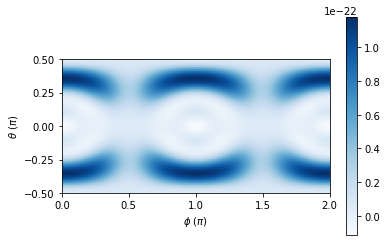

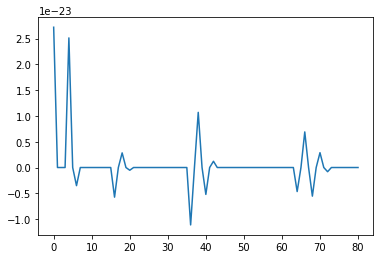

In [6]:
species_index = 1
time_index = 31

print(c.shape)

plt.figure()
plt.plot(time, c[species_index,:,:].T)
plt.xscale('log')
plt.xlabel('Time (s)')

plt.figure()
kd.plot_proj(kd.vec2grid(c[species_index, :, time_index]), clims=[])

plt.figure()
plt.plot(c[species_index,:,time_index])

In [7]:
c[species_index,[0,4,6],time_index]

array([ 2.72014494e-23,  2.51347548e-23, -3.51645495e-24])

In [8]:
# # Image of the full kinetic matrix
# plt.figure(dpi=300)
# plt.imshow(np.sign(M)*np.log(np.abs(M)))
# np.savez('M_example_lmax12', M=M)

Text(0.5, 0, 'Index')

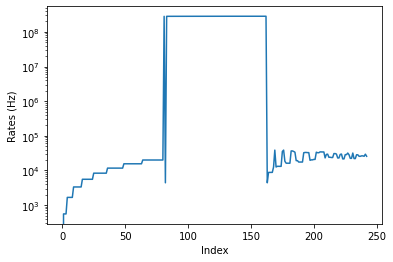

In [9]:
plt.plot(np.abs(L[0:]))
plt.yscale('log')
plt.ylabel('Rates (Hz)')
plt.xlabel('Index')